In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree

from sklearn import datasets, svm, metrics
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score

# Cancer de pulmón: Podado

In [2]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [3]:
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [4]:
y_pred = classifier.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[50  3]
 [14 76]]
              precision    recall  f1-score   support

           0       0.78      0.94      0.85        53
           1       0.96      0.84      0.90        90

    accuracy                           0.88       143
   macro avg       0.87      0.89      0.88       143
weighted avg       0.90      0.88      0.88       143



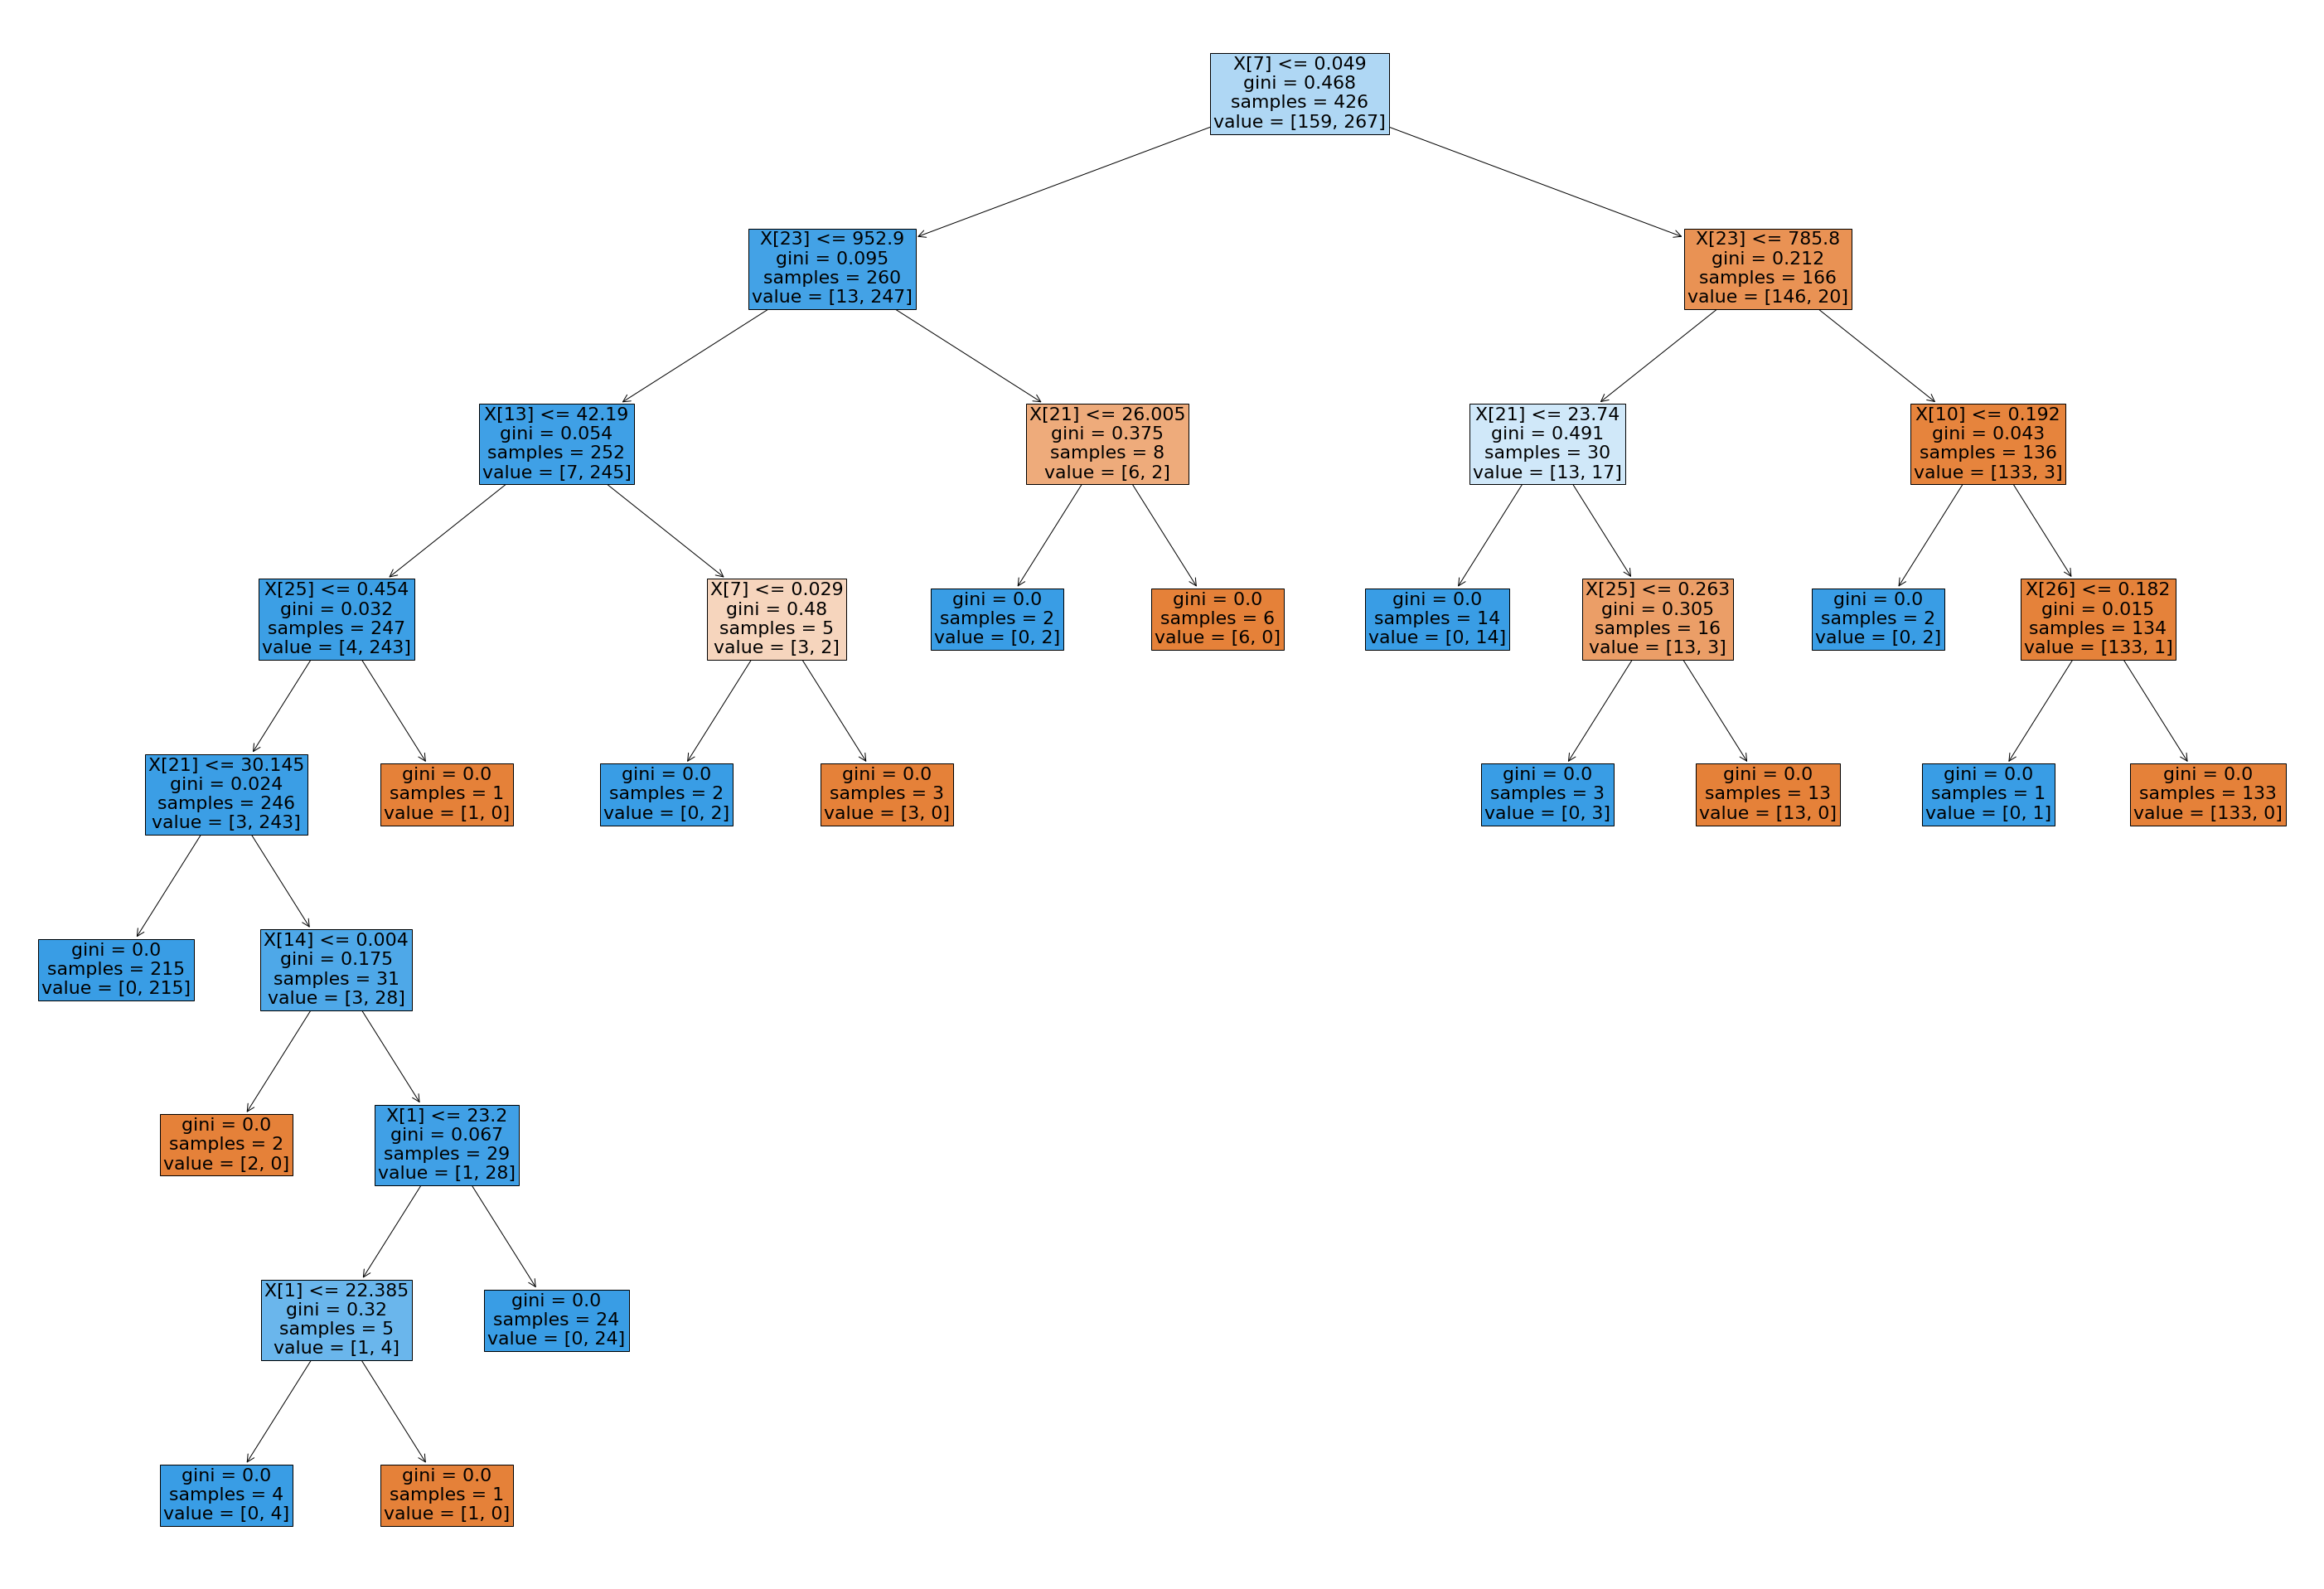

In [5]:
fig, ax = plt.subplots(figsize=(50, 35))
plot_tree(classifier, fontsize=22,filled=True)
#plt.savefig('arbol_cancer_gini.jpg', dpi=200)
plt.show()

In [6]:
full_data = load_breast_cancer()
dot_data = tree.export_graphviz(classifier, out_file=None, 
                                feature_names=full_data.feature_names,  
                                class_names=full_data.target_names,
                                filled=True)

# Impureza de las hojas vs Alpha

In [7]:
path = classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Impureza total vs alfa efectivo en el conjunto de entrenamiento')

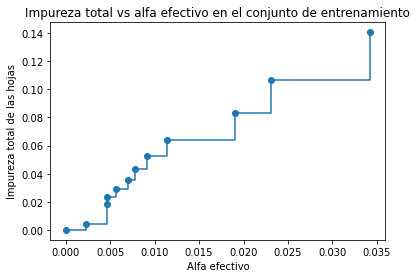

In [8]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("Alfa efectivo")
ax.set_ylabel("Impureza total de las hojas")
ax.set_title("Impureza total vs alfa efectivo en el conjunto de entrenamiento")

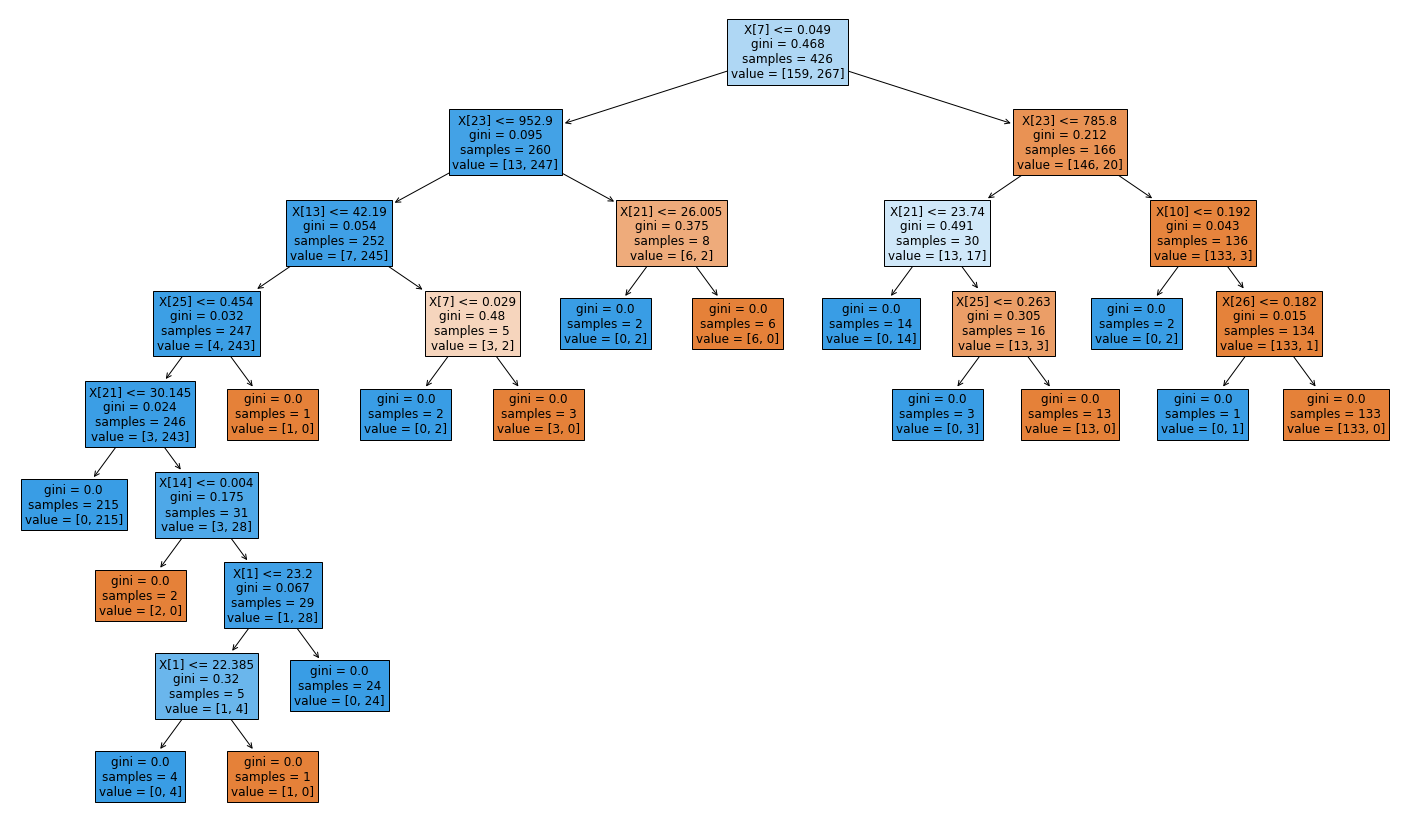

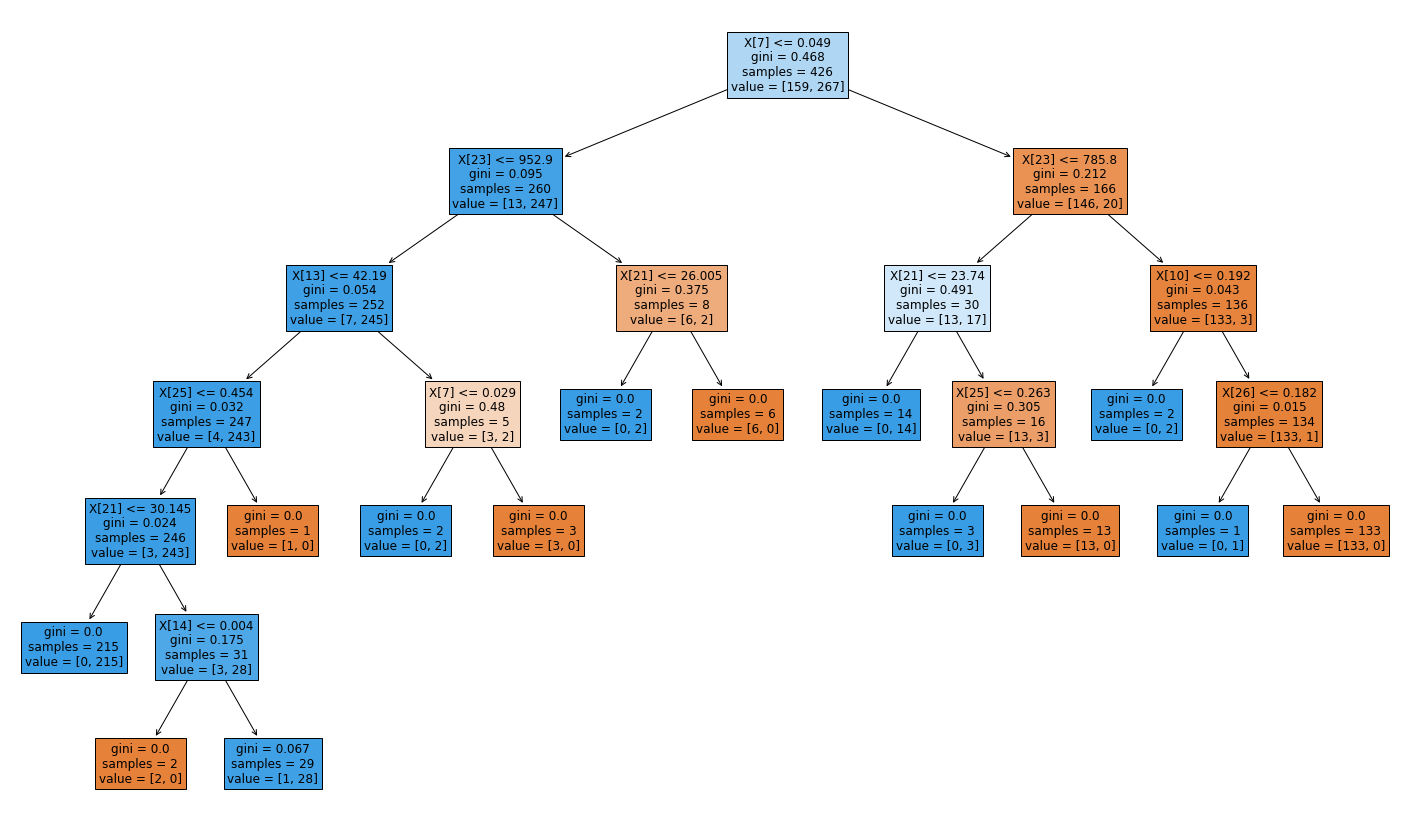

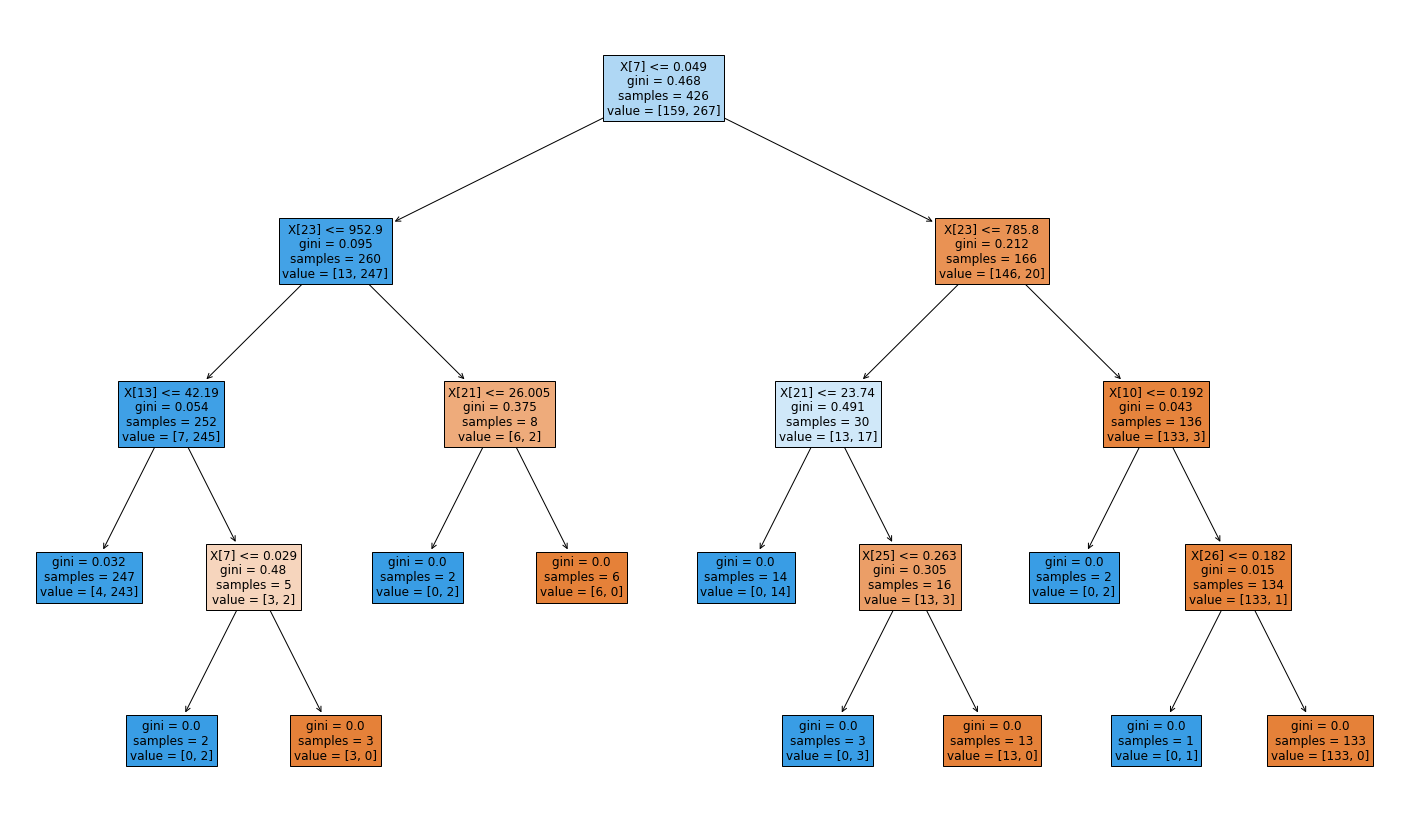

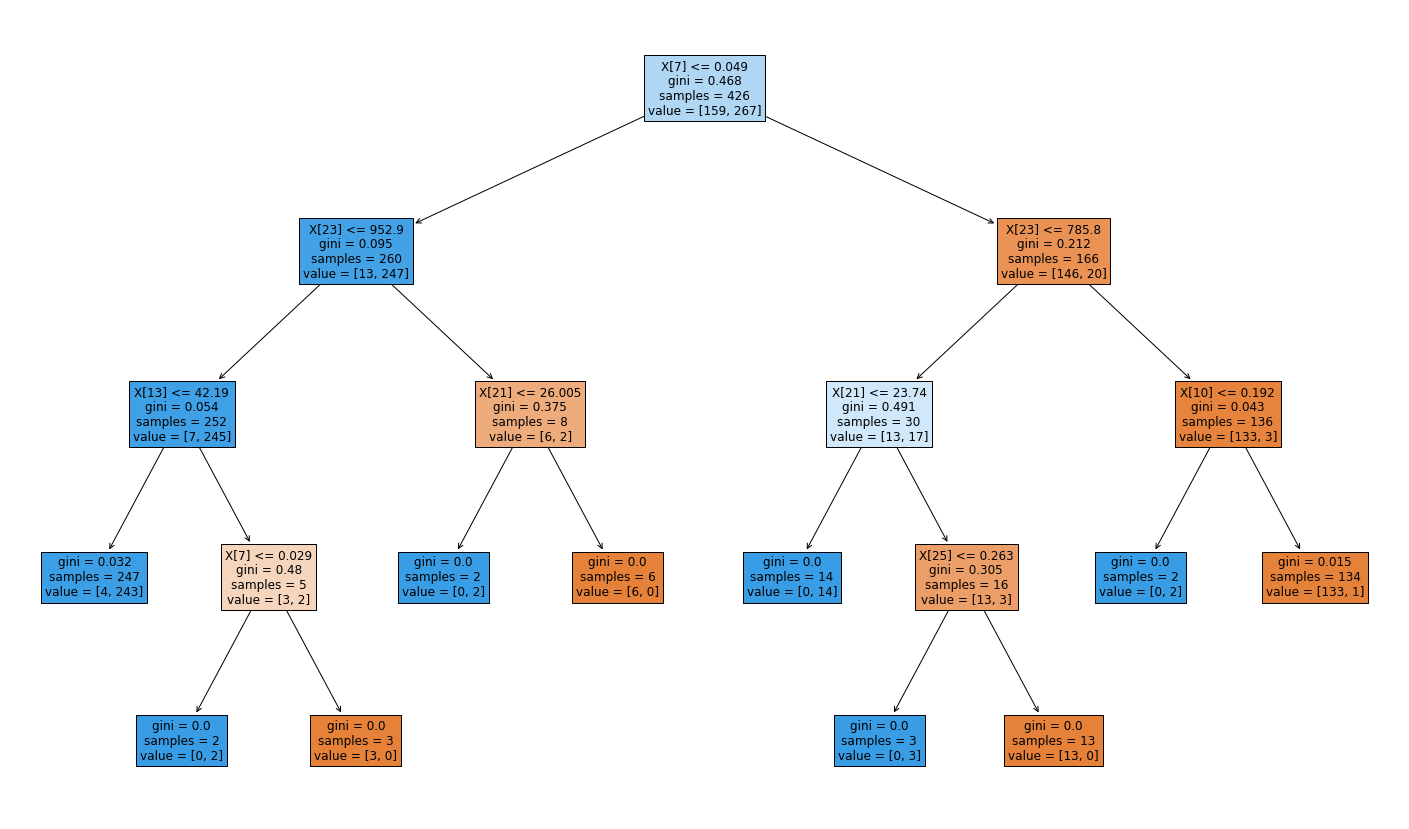

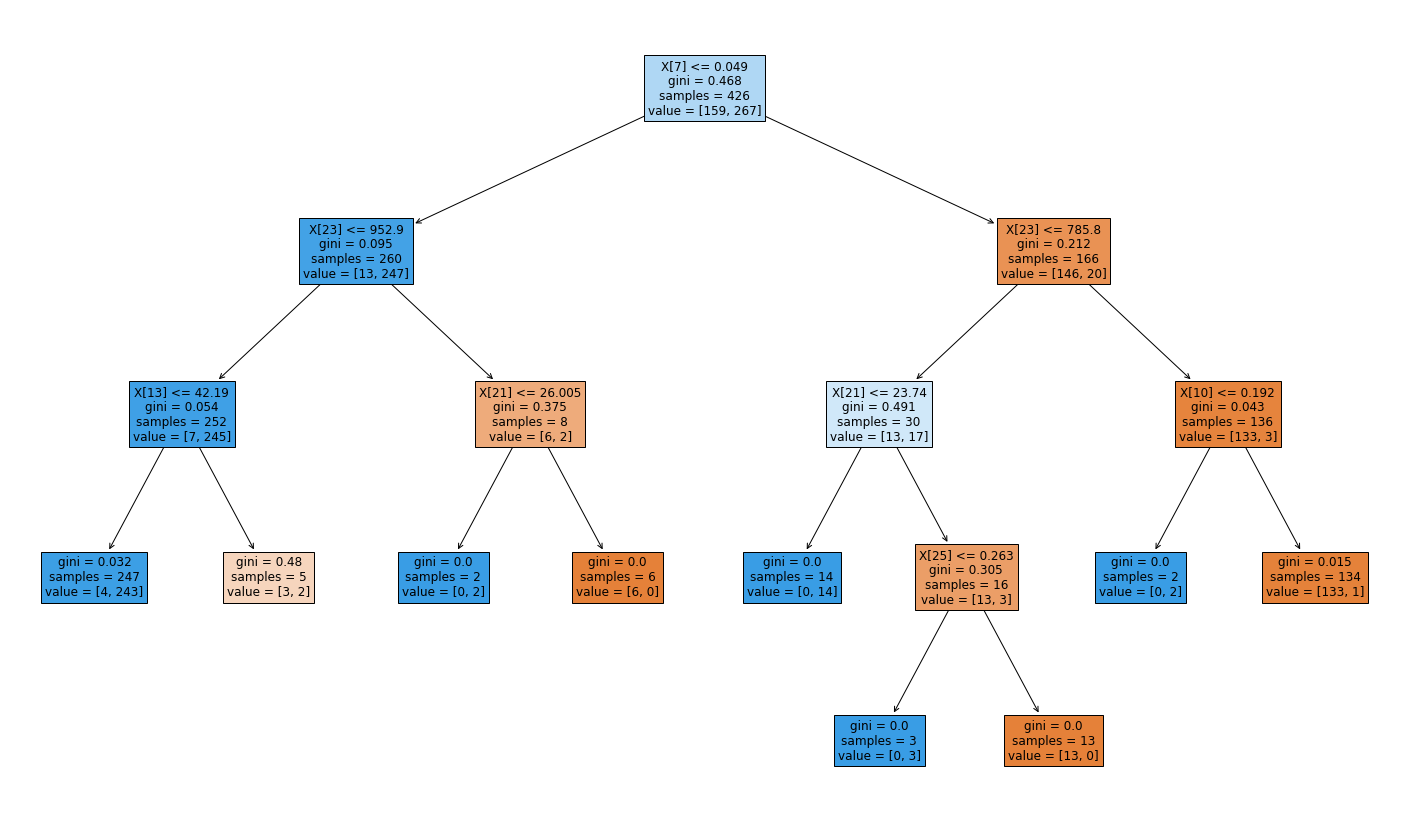

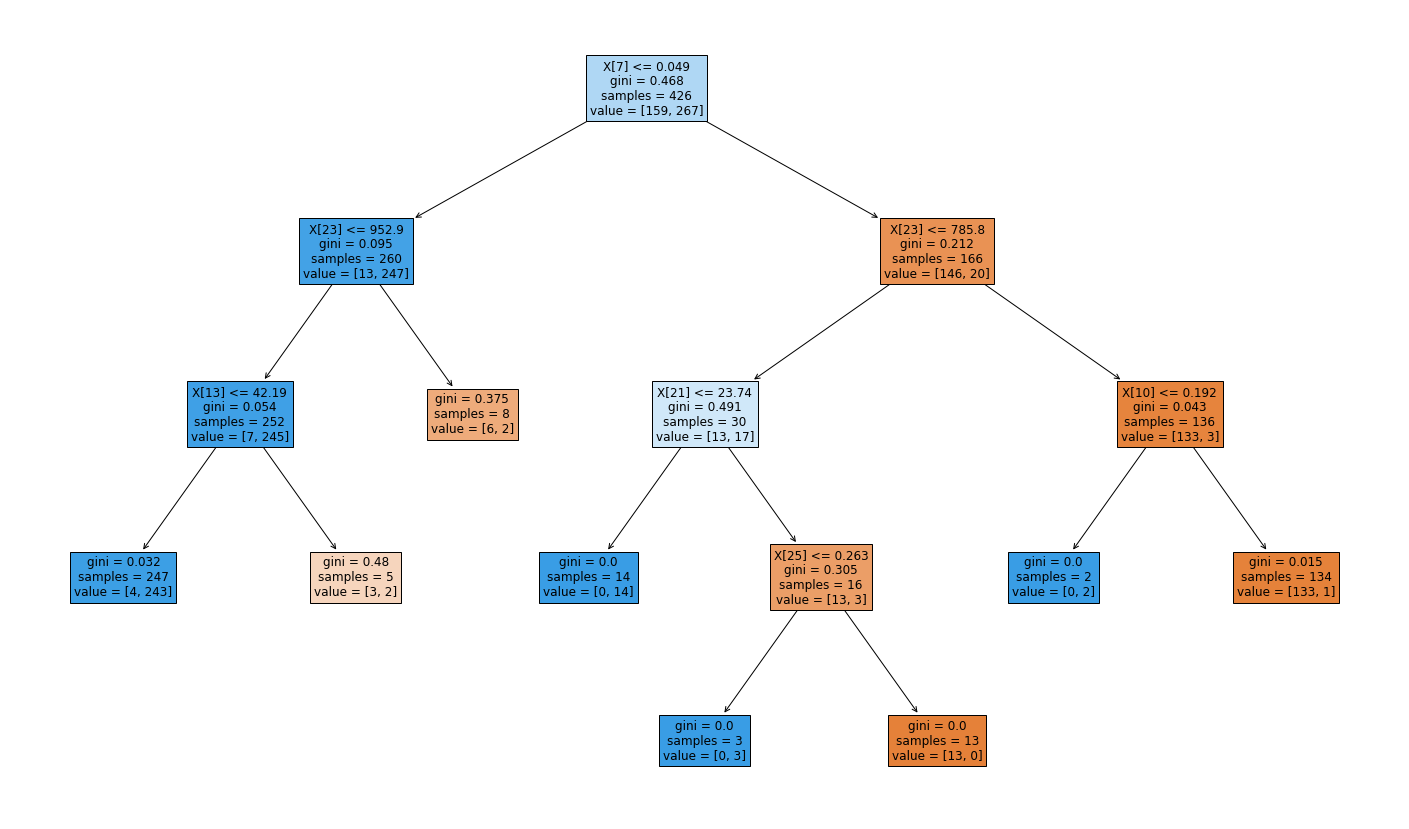

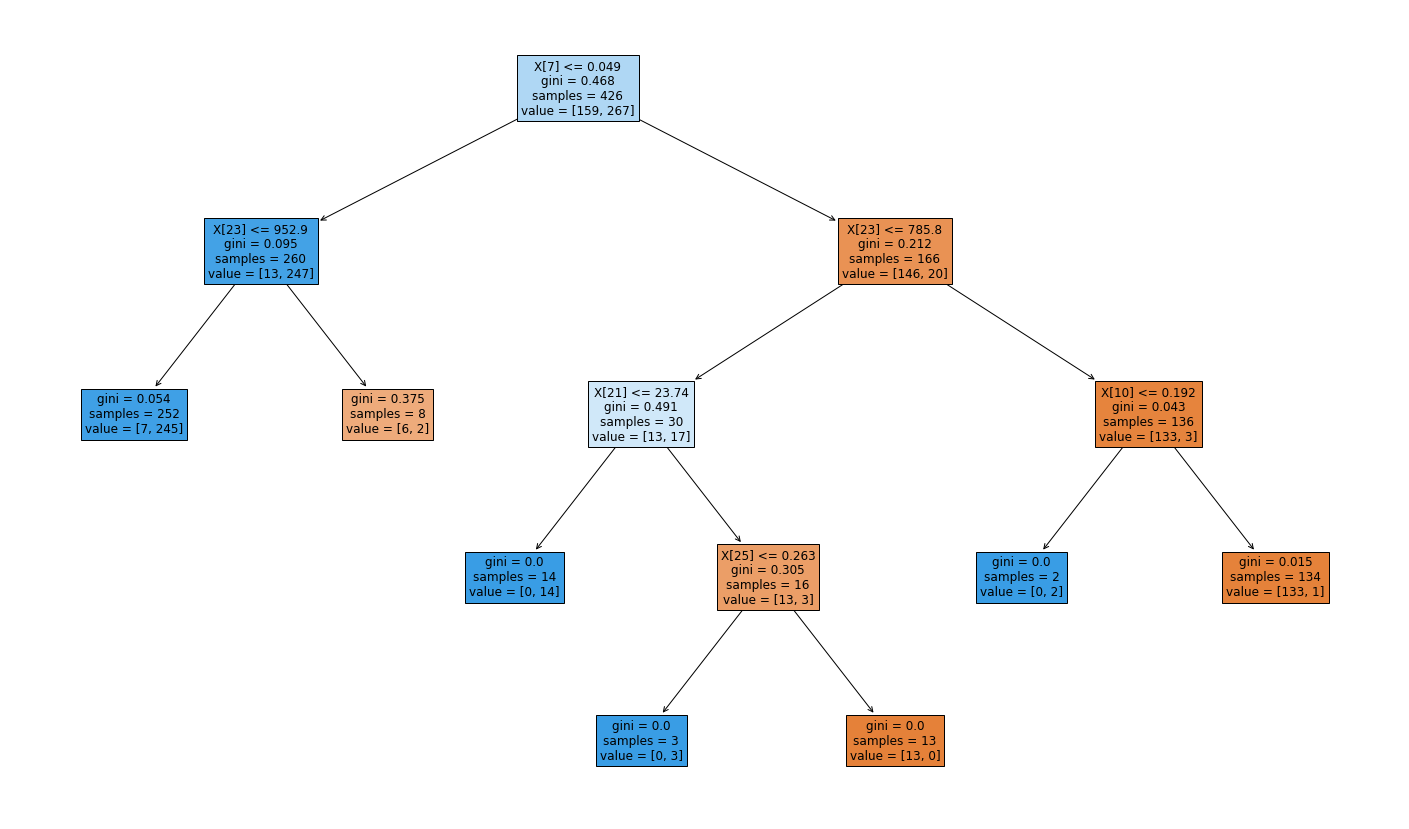

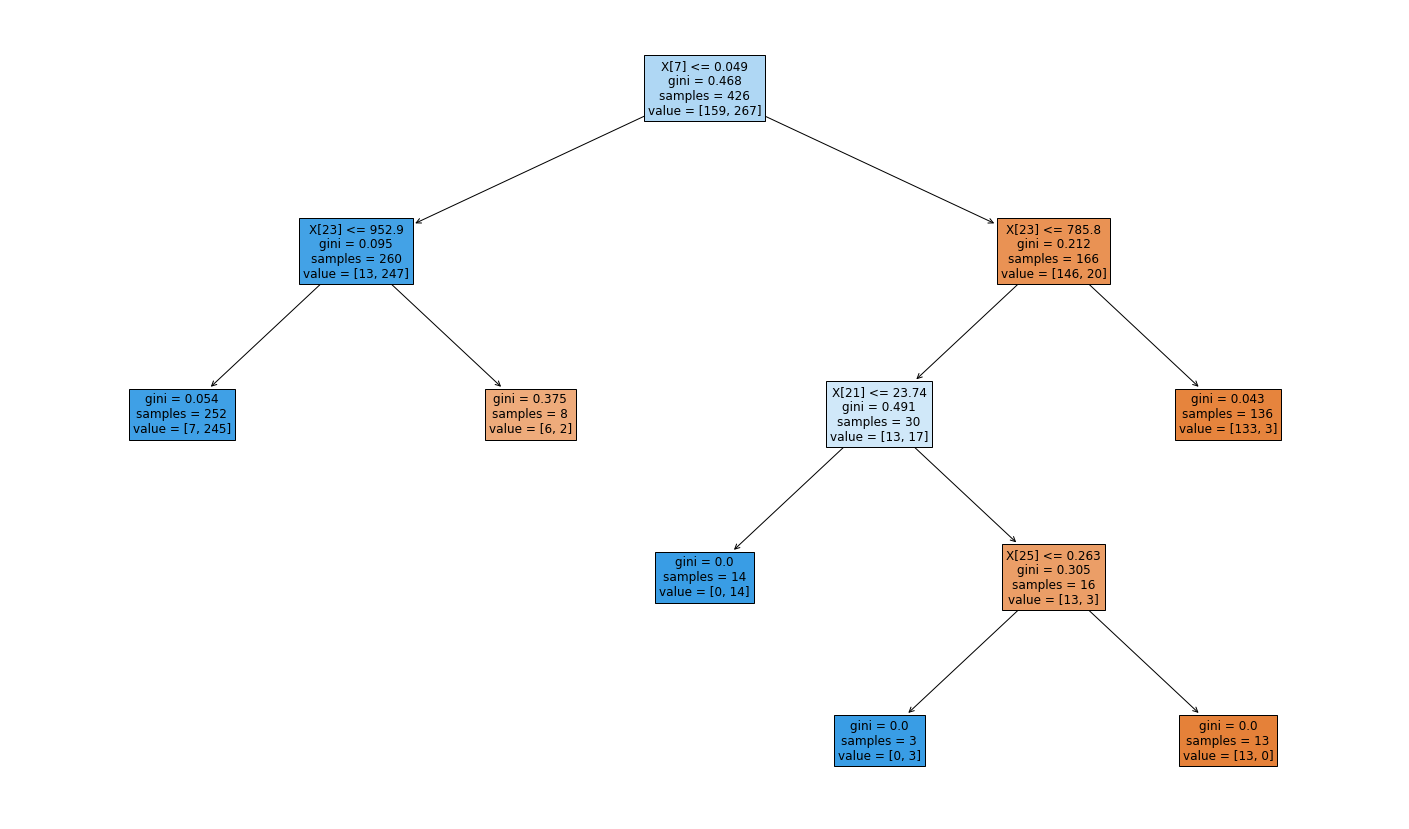

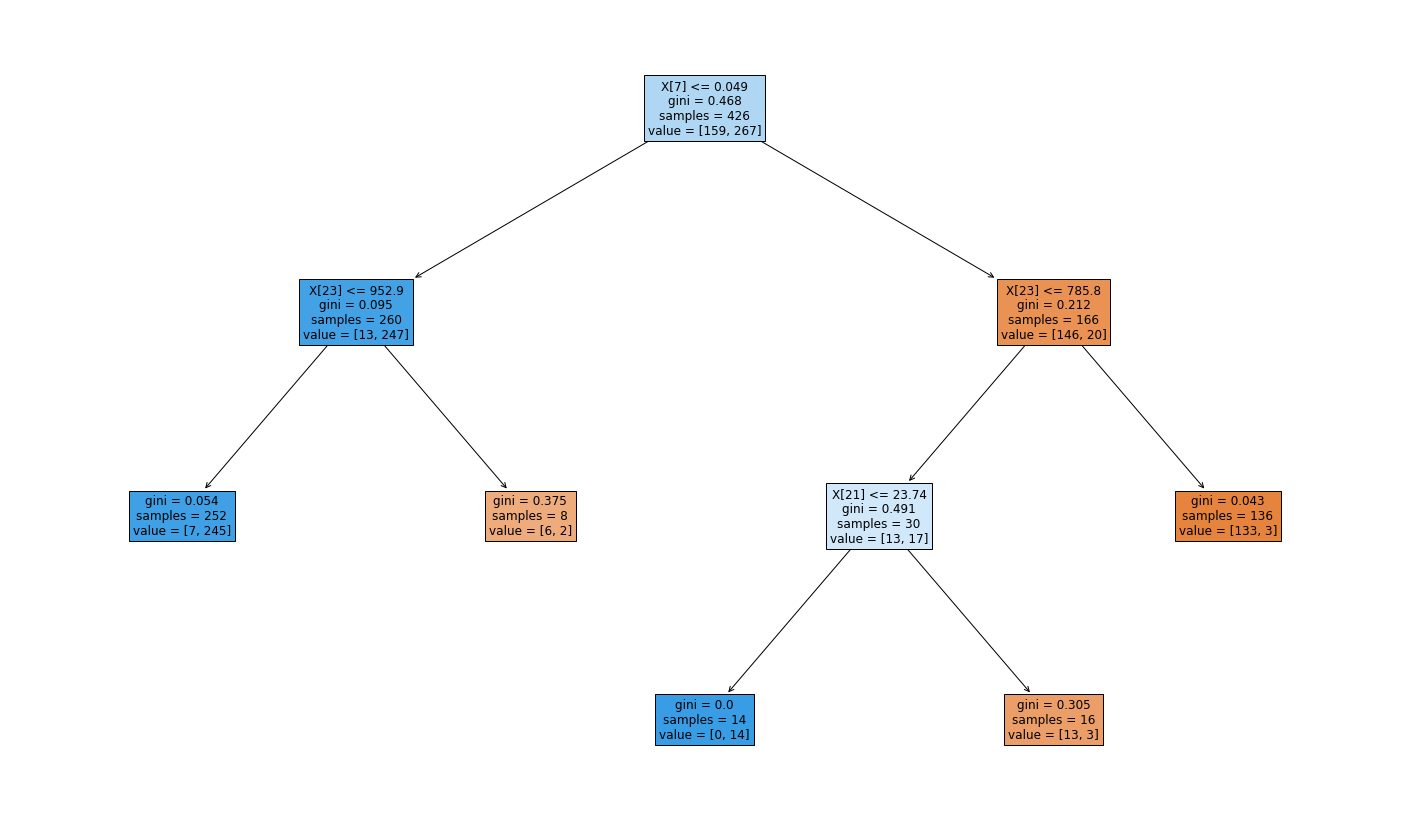

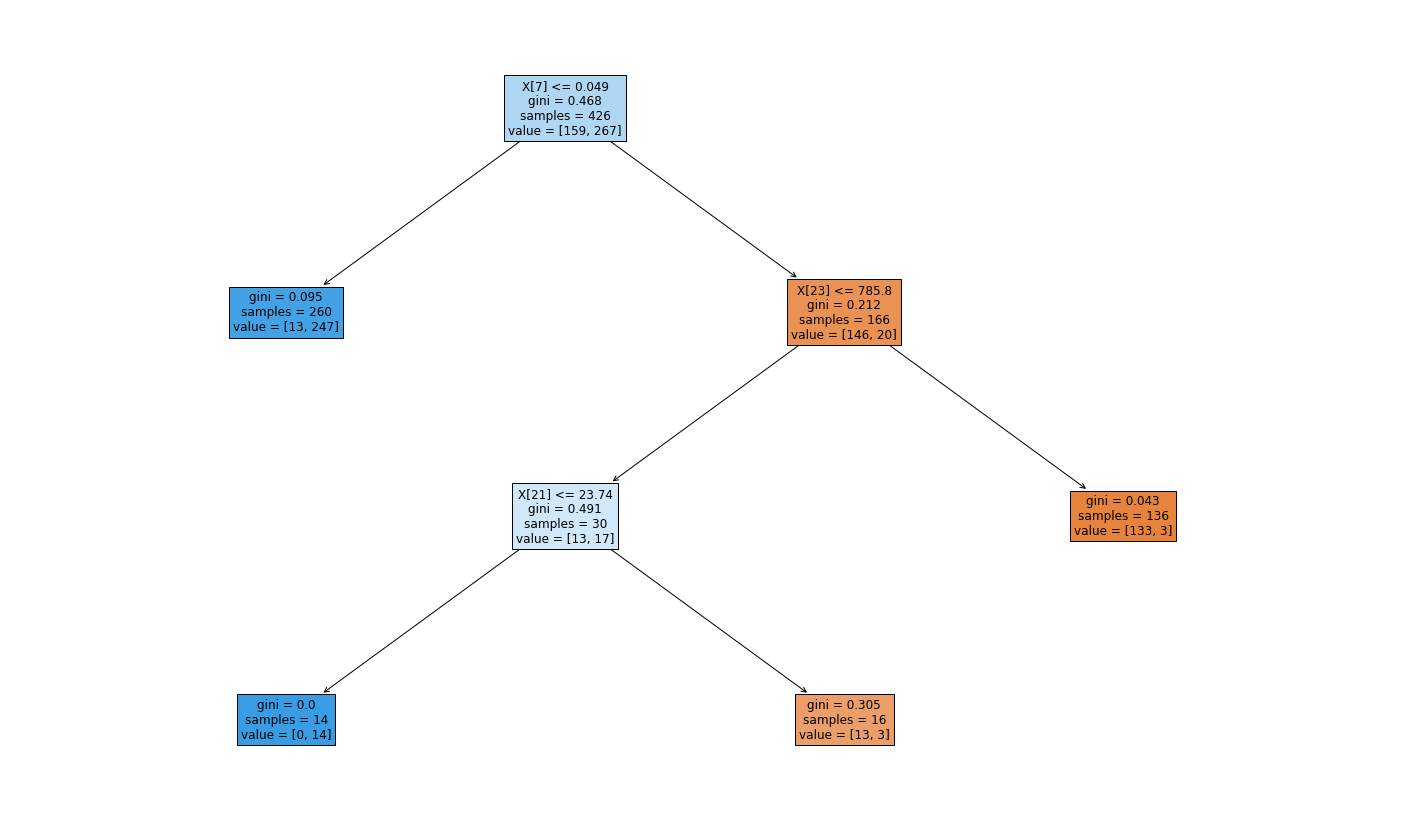

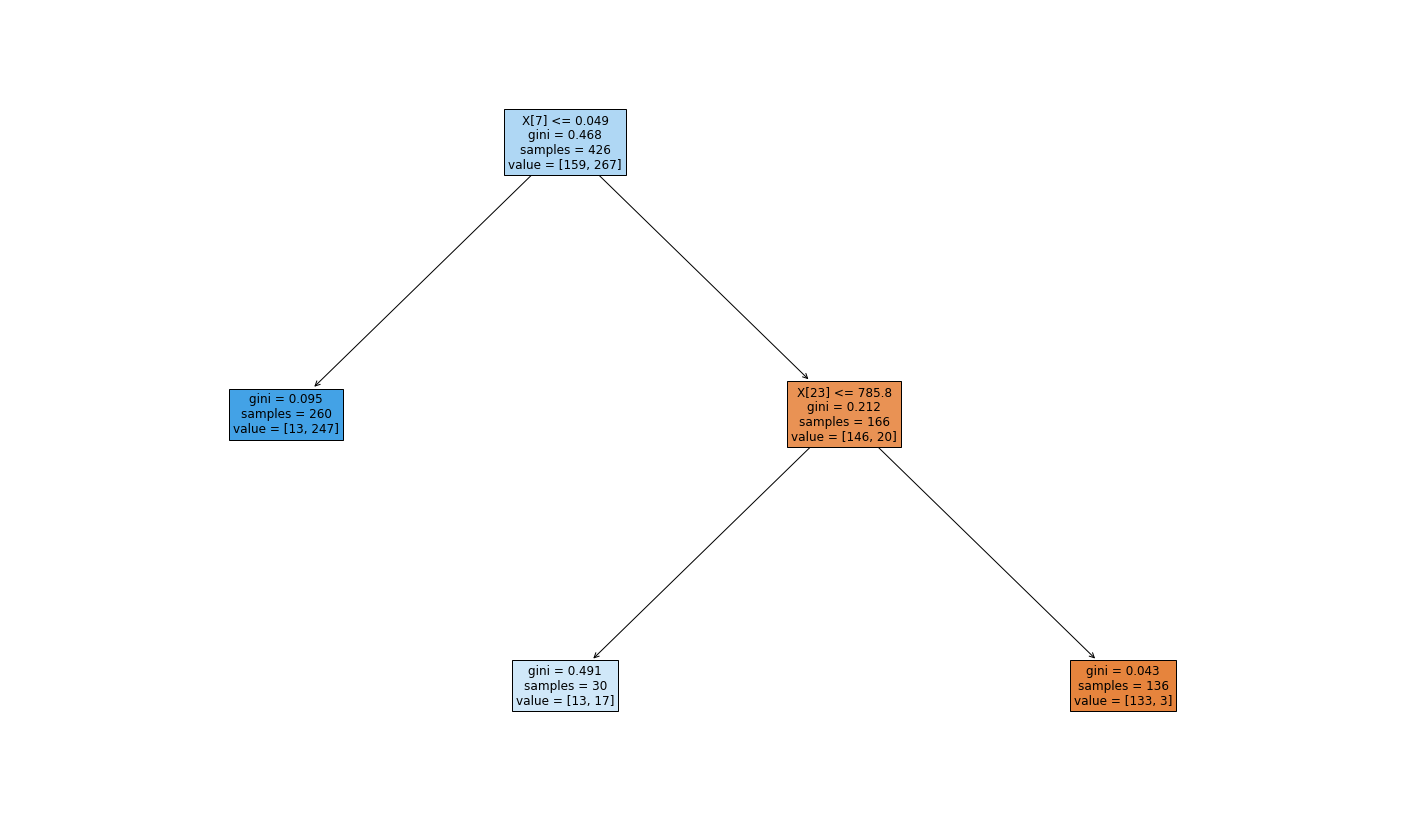

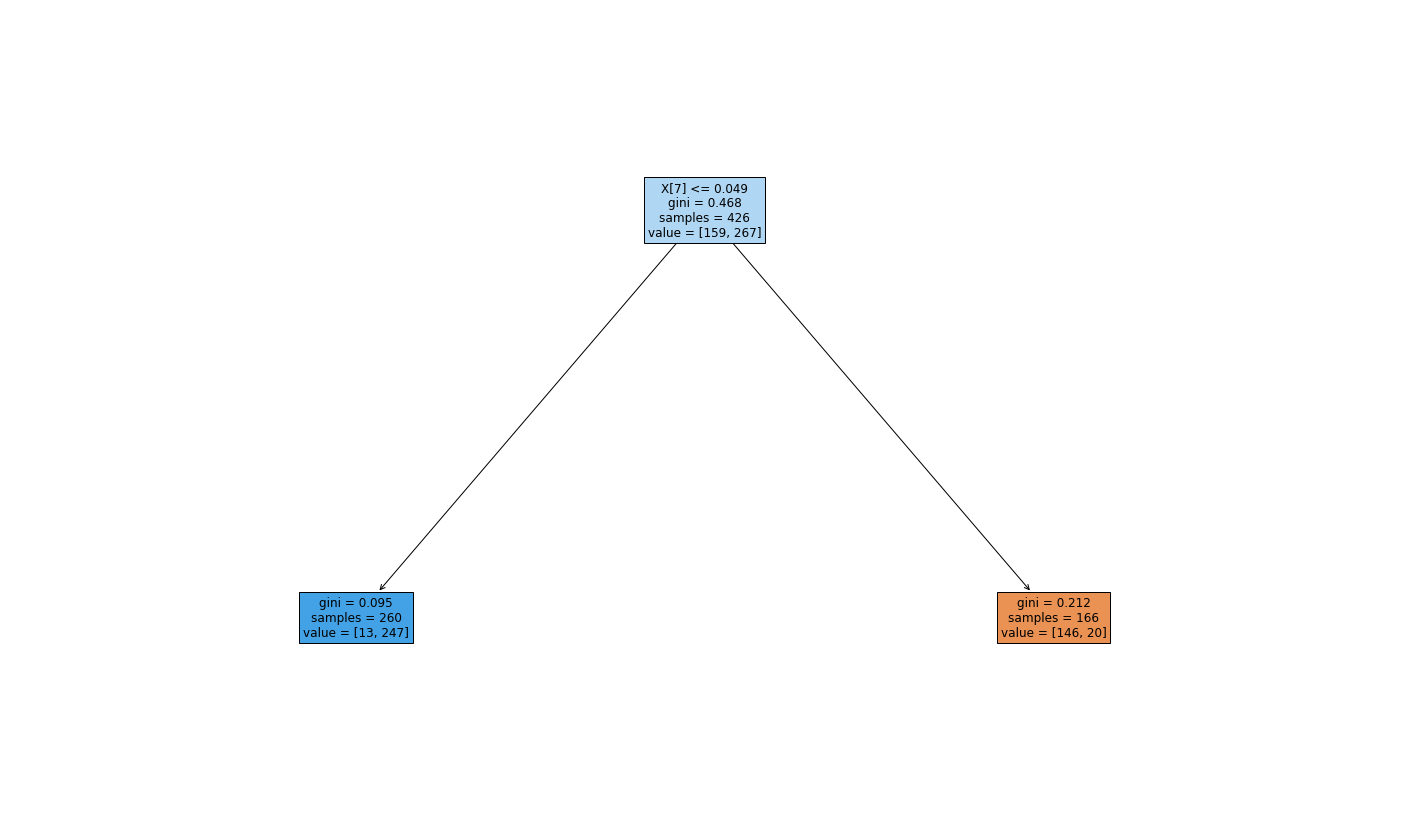

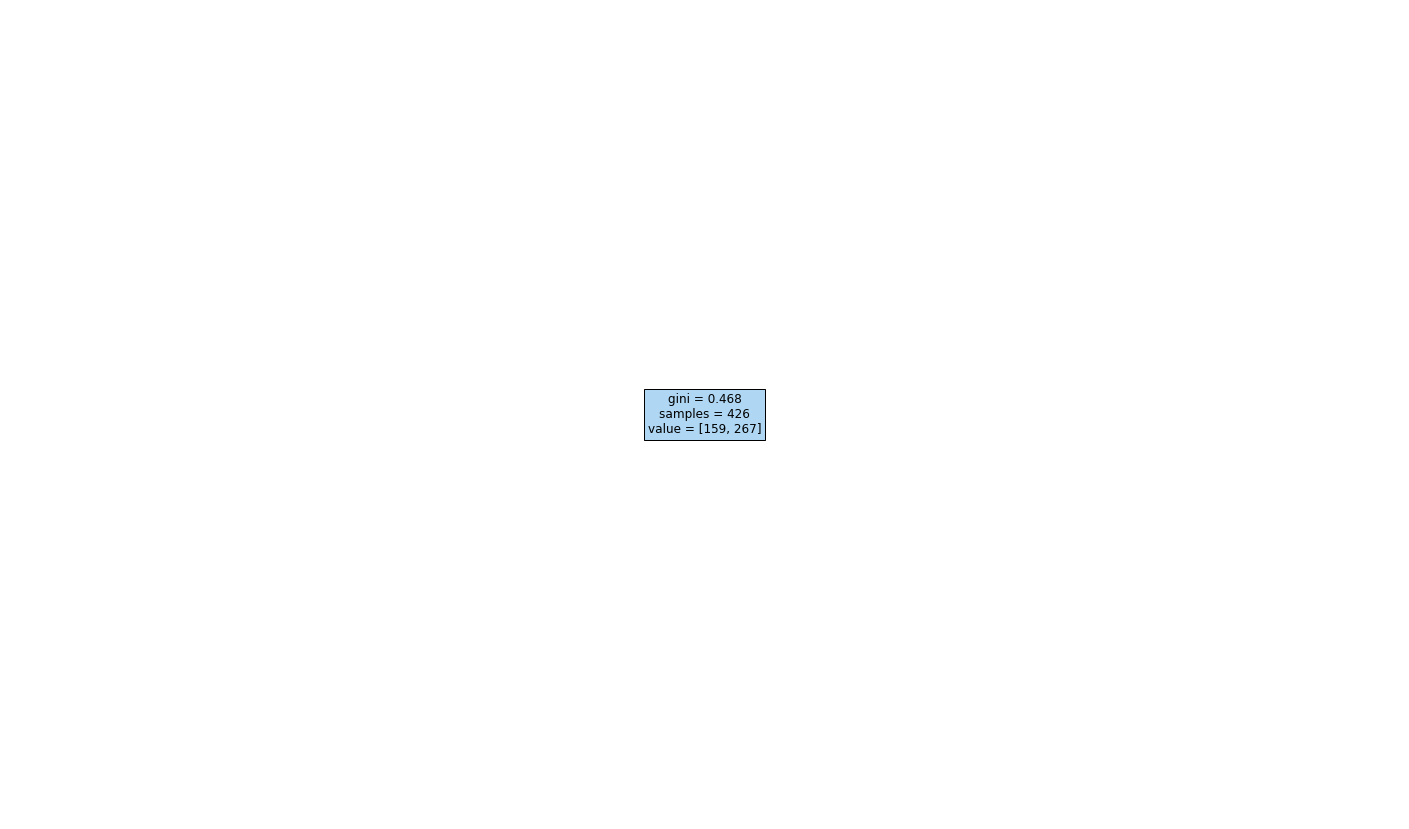

In [9]:
clfs = []
iteration=1
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    fig, ax = plt.subplots(figsize=(25, 15))
    plot_tree(clf, fontsize=12,filled=True,)
    plt.savefig("figura_"+str(iteration)+".jpg",dpi=100)
    clfs.append(clf)
    iteration+=1
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

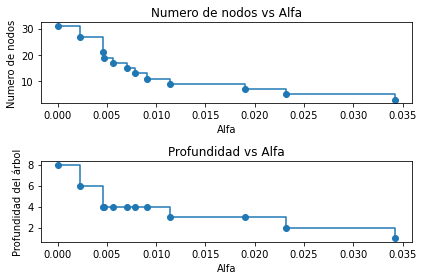

In [10]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("Alfa")
ax[0].set_ylabel("Numero de nodos")
ax[0].set_title("Numero de nodos vs Alfa")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("Alfa")
ax[1].set_ylabel("Profundidad del árbol")
ax[1].set_title("Profundidad vs Alfa")
fig.tight_layout()

# Exactitud vs Alfa

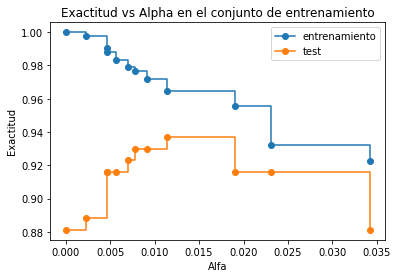

In [11]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("Alfa")
ax.set_ylabel("Exactitud")
ax.set_title("Exactitud vs Alpha en el conjunto de entrenamiento")
ax.plot(ccp_alphas, train_scores, marker='o', label="entrenamiento",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

## Elección del árbol 
Veremos 3 formas de elejir nuestro mejor árbol
Elejimos el árbol como aquel que maximiza la exactitud en el conjunto de prueba:

Accuracy best Testeo 0.9370629370629371


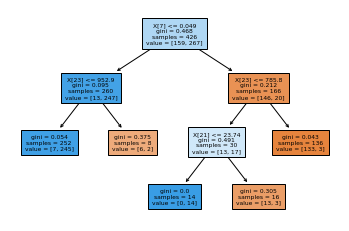

In [21]:
array_max=test_scores==max(test_scores)
list_max=array_max.tolist()
i=0
for clf in clfs:
    if list_max[i]:
        plot_tree(clf, fontsize=6,filled=True)
    i+=1
print(f"Accuracy best Testeo {max(test_scores)}")

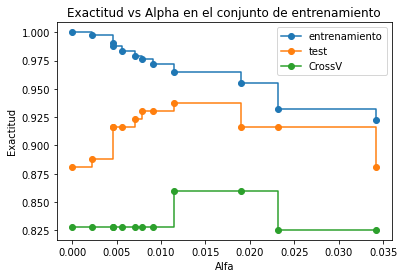

In [13]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
crossV_scores= [cross_val_score(clf,X,y,cv=9).min() for clf in clfs]
crossV_scores_std= [cross_val_score(clf,X,y,cv=9).std() for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("Alfa")
ax.set_ylabel("Exactitud")
ax.set_title("Exactitud vs Alpha en el conjunto de entrenamiento")
ax.plot(ccp_alphas, train_scores, marker='o', label="entrenamiento",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.plot(ccp_alphas, crossV_scores, marker='o', label="CrossV",
        drawstyle="steps-post")
ax.legend()
plt.show()

Elejimos el árbol como aquel que maximiza la exactitud medida por la validación cruzada:

Accuracy cross validation 0.859375
Desviacion estandar cross validation 0.036279333735191745


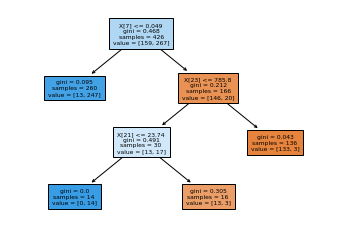

In [19]:
array_max=crossV_scores==max(crossV_scores)
list_max=array_max.tolist()
i=0
for clf in clfs:
    if list_max[i]:
        plot_tree(clf, fontsize=6,filled=True)
        crossV_scores_max=crossV_scores[i]
        crossV_scores_max=crossV_scores[i]
        crossV_scores_max_std=crossV_scores_std[i]
    i+=1
print(f"Accuracy cross validation {crossV_scores_max}")
print(f"Desviacion estandar cross validation {crossV_scores_max_std}")

Elejimos el árbol por la regla de 1 desviación estándar:

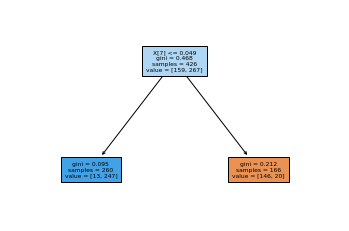

In [15]:
limite=crossV_scores_max-crossV_scores_max_std
restriccion=crossV_scores >=limite
alpha_mayor_en_restr=ccp_alphas[restriccion].max()
i=0
for clf in clfs:
    if (ccp_alphas==alpha_mayor_en_restr)[i]:
        plot_tree(clf, fontsize=6,filled=True)
    i+=1

# Reconocimiento de numeros 

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


<Figure size 432x288 with 0 Axes>

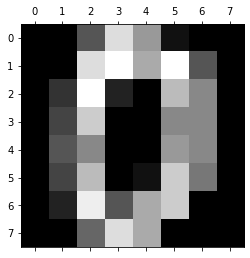

In [16]:
from sklearn.datasets import load_digits
digits=load_digits()
plt.gray() 
plt.matshow(digits.images[0]) 
print(digits.images[0])
plt.show() 

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        88
           1       0.78      0.65      0.71        91
           2       0.88      0.73      0.80        86
           3       0.75      0.76      0.75        91
           4       0.81      0.85      0.83        92
           5       0.57      0.75      0.65        91
           6       0.88      0.92      0.90        91
           7       0.85      0.74      0.79        89
           8       0.64      0.61      0.63        88
           9       0.65      0.72      0.68        92

    accuracy                           0.77       899
   macro avg       0.78      0.77      0.77       899
weighted avg       0.78      0.77      0.77       899

[[82  1  0  0  1  4  0  0  0  0]
 [ 1 59  2  6  7  2  0  4  2  8]
 [ 1  2 63  8  0  0  3  0  7  2]
 [ 0  2  1 69  0  2  0  5  8  4]
 [ 1  1  0  0 78  5  2  1  2  2]
 [ 0  2  0  0  1 68  2  0  1 17]
 [ 1  2  1  0  0  1 84  0  2  0]
 [ 0  1  0

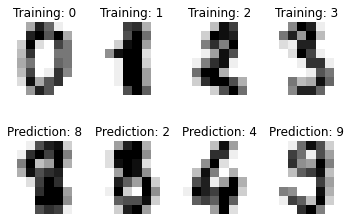

In [17]:
criterio="gini"

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

classifier = DecisionTreeClassifier(criterion=criterio)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

    images_and_predictions = list(zip(digits.images[n_samples // 2:], y_pred))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

print((metrics.classification_report(y_test, y_pred)))
print((metrics.confusion_matrix(y_test, y_pred)))


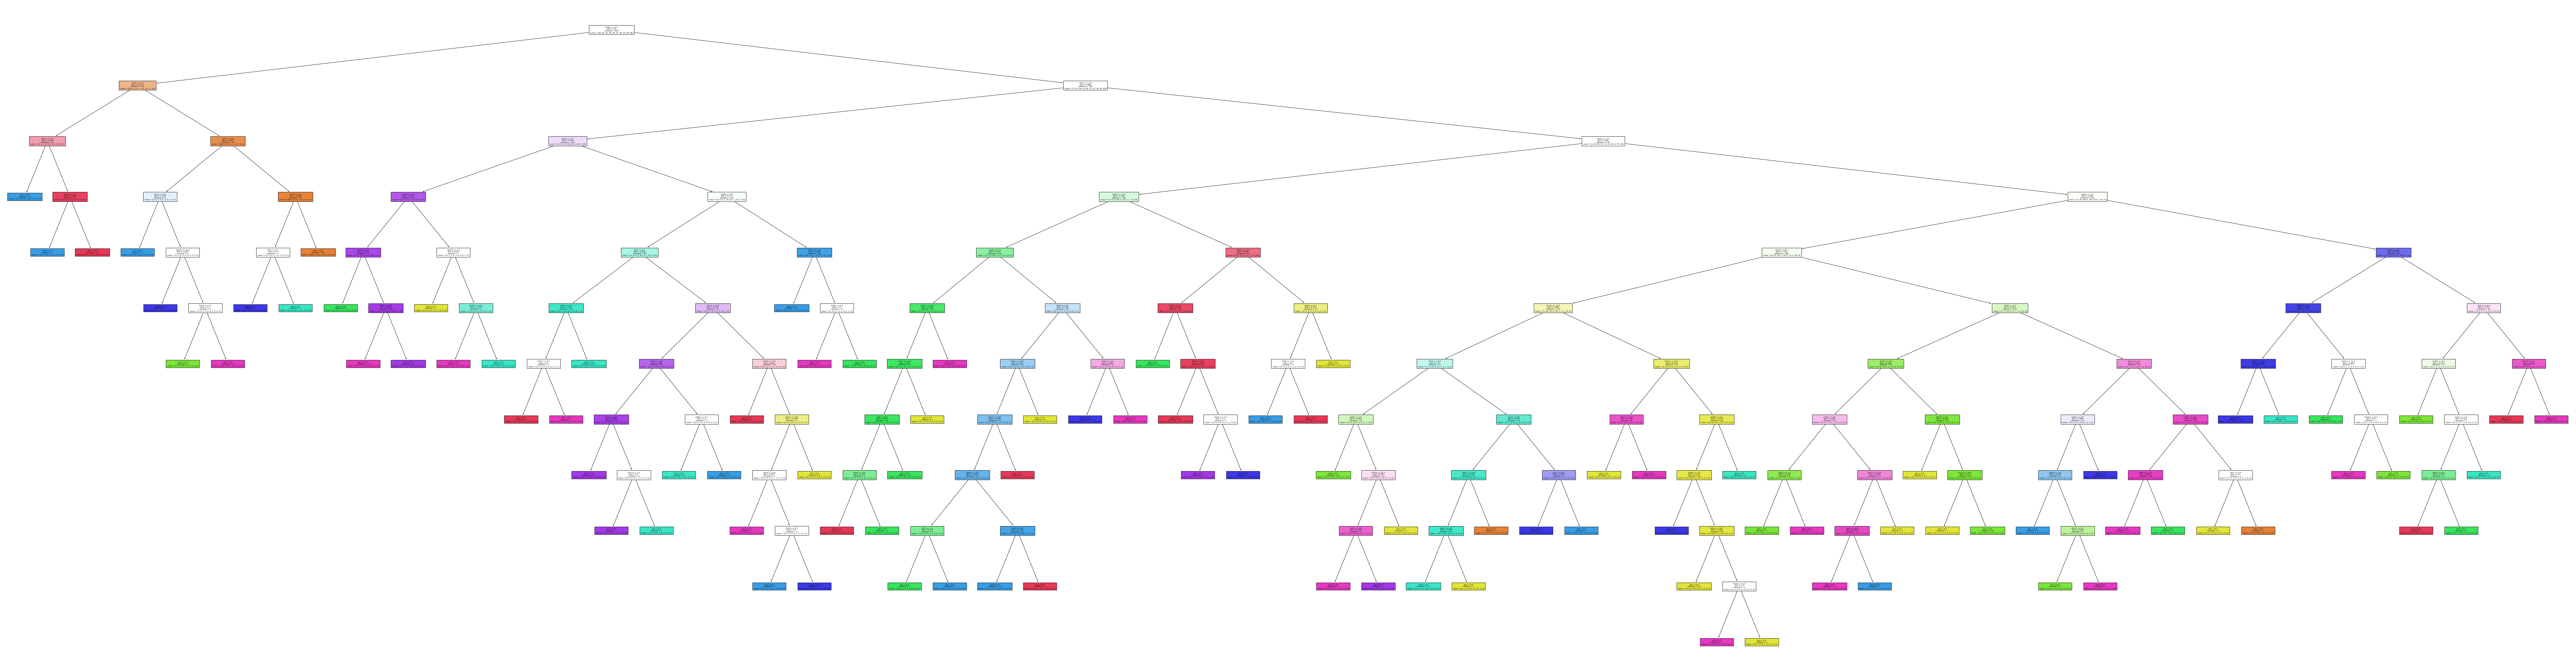

In [18]:
fig, ax = plt.subplots(figsize=(150, 40))
plot_tree(classifier, fontsize=6,filled=True)
#plt.savefig('arbol_numeros_gini.jpg', dpi=100)
plt.show()